In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import numpy as np
import os
import acoustic_data_science.config as config
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_feather(path=config.processed_data_path + '/2018_08.feather')
df = df[df['loud']]
df.head()

,25,32,40,50,63,79,100,126,158,200,...,12589,15849,19953,25119,filename,timestamp,broadband_spl,background_spl,loud,short_transient
16579,66.863640,70.259956,68.365021,68.890602,61.871201,67.794281,63.187988,60.906067,60.242050,61.349785,...,80.909615,76.675468,76.744865,72.688705,ICLISTENHF1266_20180802T031304.000Z_TOL_1sHann...,2018-08-02 03:16:33.000,-49.712630,-63.018850,True,True
16891,64.253380,89.372025,85.597137,72.882141,67.395378,68.206055,64.113258,64.929901,60.039650,57.753197,...,58.929390,59.488087,60.486340,57.718498,ICLISTENHF1266_20180802T031804.000Z_TOL_1sHann...,2018-08-02 03:19:09.500,-52.608642,-63.132183,True,True
18017,58.710720,62.790684,66.277863,65.653748,59.980873,59.472771,59.706337,64.054565,67.307297,70.367569,...,82.154961,79.603065,79.779694,78.211487,ICLISTENHF1266_20180802T032804.000Z_TOL_1sHann...,2018-08-02 03:28:33.500,-44.569833,-63.775796,True,True
20032,64.684822,67.376648,64.878799,61.265408,66.816467,67.186241,62.567608,63.545204,61.919773,63.894661,...,86.346924,81.888298,84.245155,82.849876,ICLISTENHF1266_20180802T034305.000Z_TOL_1sHann...,2018-08-02 03:45:23.500,-52.138252,-64.648478,True,True
20253,68.975677,70.004433,67.419479,66.922958,60.980789,67.380836,83.813965,84.775375,84.044113,79.624619,...,60.250381,60.681328,60.950703,57.919811,ICLISTENHF1266_20180802T034305.000Z_TOL_1sHann...,2018-08-02 03:47:14.000,-52.950558,-64.673202,True,True


In [7]:
def get_transient_durations(df):
    # Mask df to only get loud rows.
    df['index_group'] = (df.index - np.arange(df.shape[0]))
    index_groups = df['index_group'].unique()
    
    transient_durations = []
    for index_group in index_groups:
        transient_times = df[df['index_group']==index_group]['timestamp'].values
        transient_durations.append((transient_times[-1] - transient_times[0]).astype('float')/1e9 + 0.5)
    
    # Cull any detected transient with length longer than 5 mins. Arbitrary for now.
    #transient_durations[i] = transient_durations[transient_durations < 5*60]
    transient_durations = np.array(transient_durations)
    return transient_durations

In [4]:
data_path = config.processed_data_path

months = config.get_months(data_path)
monthly_transient_durations = []

for feather_path in config.get_feather_paths(data_path):
    print(feather_path)
    
    df = pd.read_feather(feather_path)
    df = df[df['loud']]
    monthly_transient_durations.append(get_transient_durations(df))

monthly_transient_durations

/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_08.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_09.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_10.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_11.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_12.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_01.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_02.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_03.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_04.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/proces

[array([ 0.5,  0.5,  0.5, ..., 24. ,  2. ,  0.5]),
 array([188. ,   0.5,   1.5, ...,   1. ,   0.5,   0.5]),
 array([ 1. ,  0.5,  0.5, ..., 28. , 28. , 20.5]),
 array([37.5, 37.5,  0.5, ...,  0.5,  0.5, 13.5]),
 array([29.5,  0.5,  0.5, ...,  0.5,  6.5, 36.5]),
 array([24. , 63. ,  1.5, ...,  0.5,  0.5,  1. ]),
 array([ 1. ,  0.5,  0.5, ..., 16.5,  1.5,  0.5]),
 array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 5. ]),
 array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]),
 array([ 0.5,  0.5,  0.5, ...,  0.5,  2. , 31. ])]

In [14]:
def report_transient_stats(transient_durations):
    print('min (s)', transient_durations.min())
    print('max (s)', transient_durations.max()/ 60) 
    print(f'max (mins) {transient_durations.max()/ 60:.2f}') 
    print('sd ', transient_durations.std())
    
    print('Number of transients with durations > 0.5 ' , len(transient_durations[transient_durations>0.5]))
    print('Number of transients with durations = 0.5 ', len(transient_durations[transient_durations==0.5]))

In [52]:
longest_duration = np.max(np.concatenate(monthly_transient_durations)) # seconds
longest_duration // 60**2 # hours

4.0

In [75]:
short_transient_counts = []
for transient_durations in monthly_transient_durations:
    short_transient_counts.append(len(transient_durations[transient_durations == 0.5]))

# Assumes that 0.5 s is the most common bin.
largest_bin = max(short_transient_counts)

In [122]:
def get_max_bin_size(monthly_transient_durations, bins, min_duration=None, max_duration=None):
    max_bin_size = 0
    for transient_durations, month in zip(monthly_transient_durations, months):
        if min_duration is not None:
            transient_durations = transient_durations[transient_durations >= min_duration]

        if max_duration is not None:
            transient_durations = transient_durations[transient_durations <= max_duration]

        bin_size = max(np.histogram(transient_durations, bins=bins)[0])
        if bin_size > max_bin_size:
            max_bin_size = bin_size

    return max_bin_size

In [152]:
def plot_duration_histograms(monthly_transient_durations, bins, min_duration=None, max_duration=None, title="", xunits='seconds'):
    fig = plt.figure(figsize=(15,15))
    fig.suptitle(f"{title} {bins} bins.")
    
    i = 0
    for transient_durations, month in zip(monthly_transient_durations, months):
        i += 1

        if min_duration is not None:
            transient_durations = transient_durations[transient_durations >= min_duration]

        if max_duration is not None:
            transient_durations = transient_durations[transient_durations <= max_duration]

        if xunits == 'minutes':
            transient_durations = transient_durations / 60

        ax = fig.add_subplot(4,3,i)
        ax.set_title(month)
        ax.hist(transient_durations, bins=bins)
        ax.set_ylim(0, get_max_bin_size(monthly_transient_durations, bins=bins, min_duration=min_duration, max_duration=max_duration))

        ax.set_ylabel("Count")
        ax.set_xlabel(f"Duration ({xunits})")

    plt.tight_layout()
    plt.show()

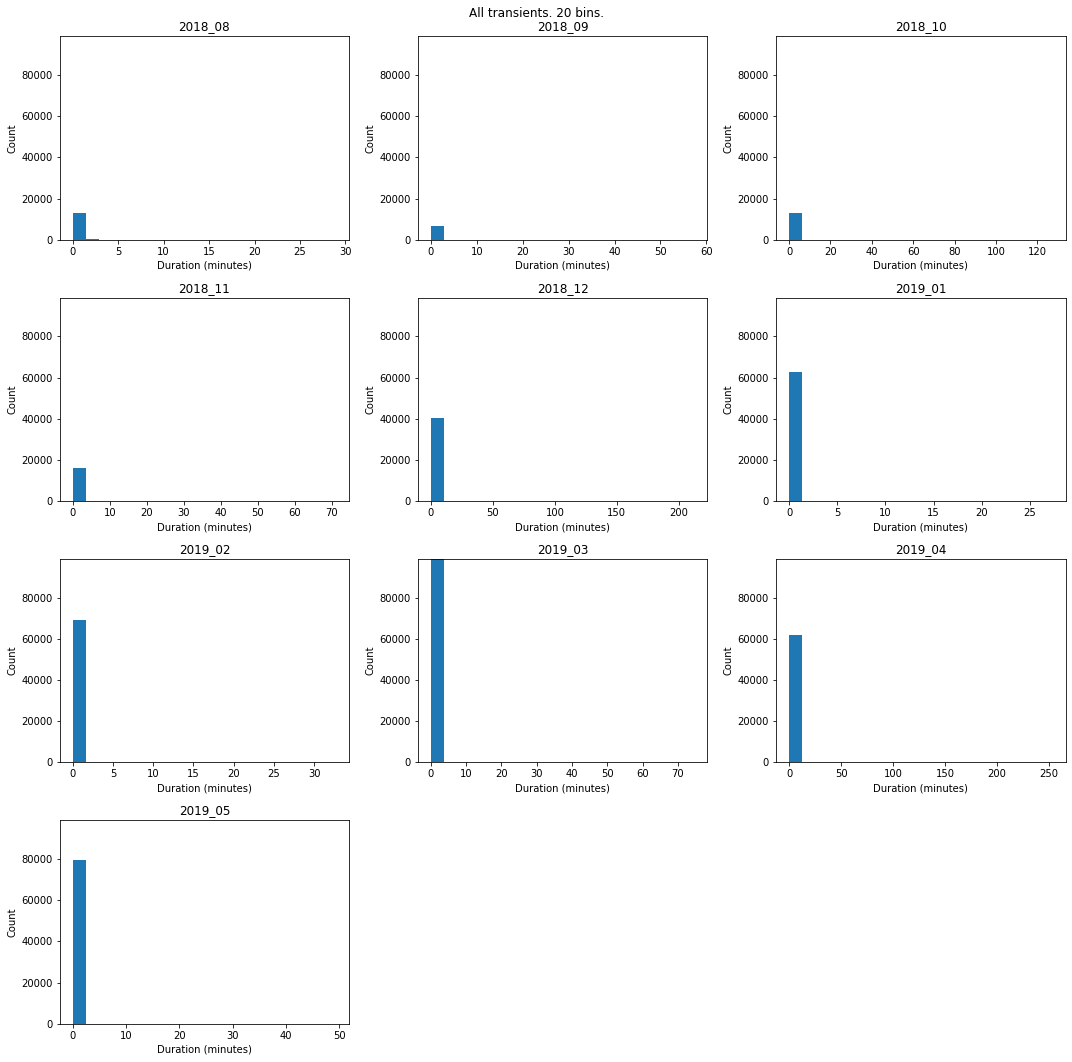

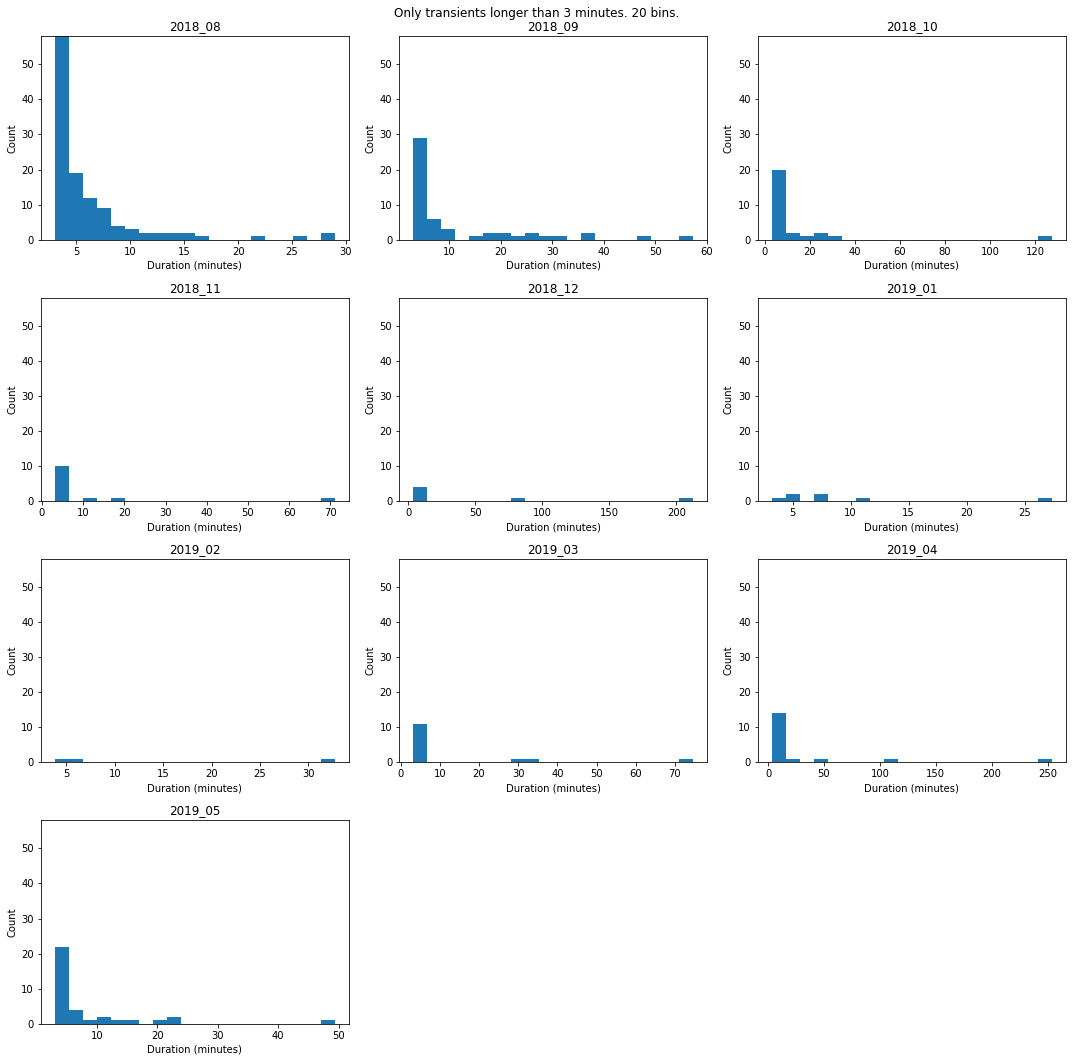

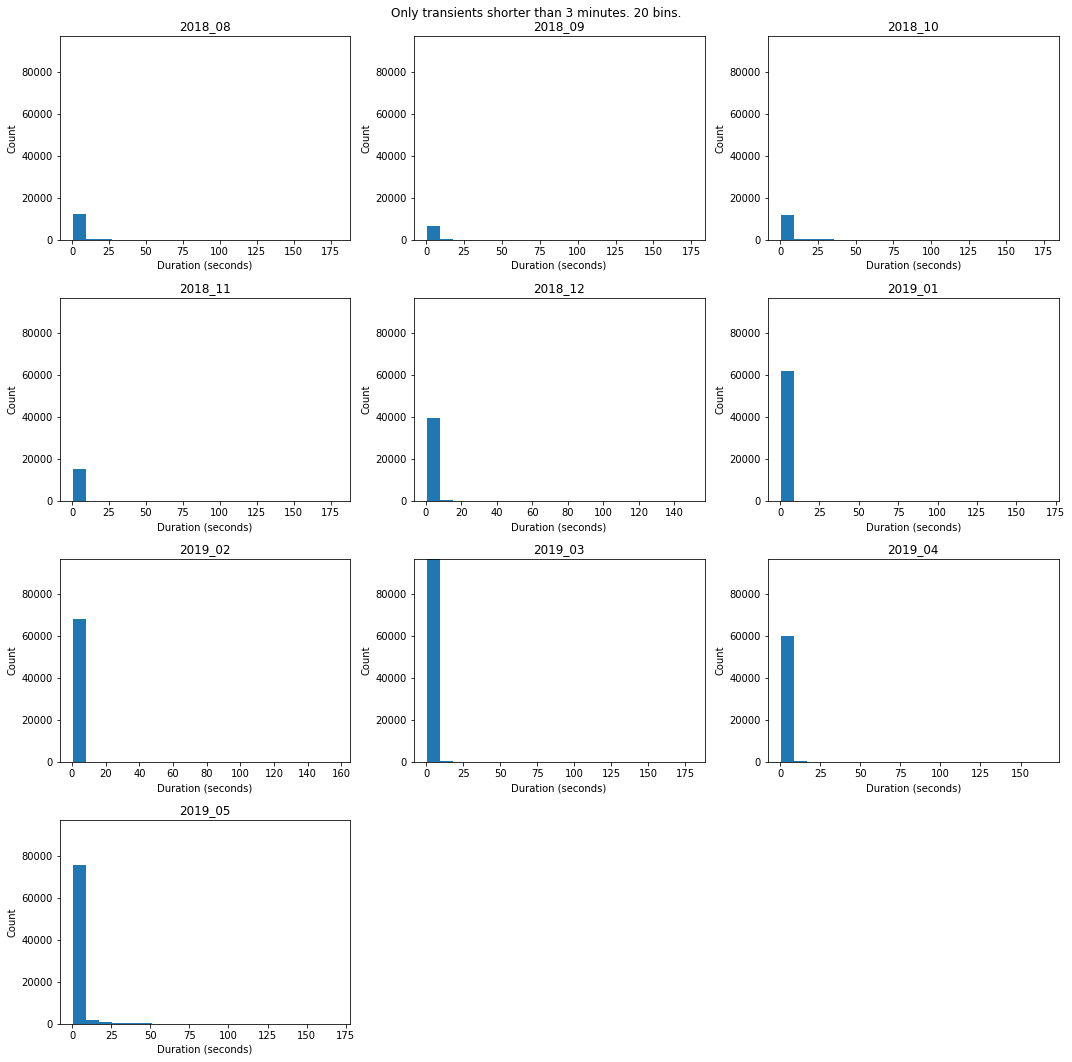

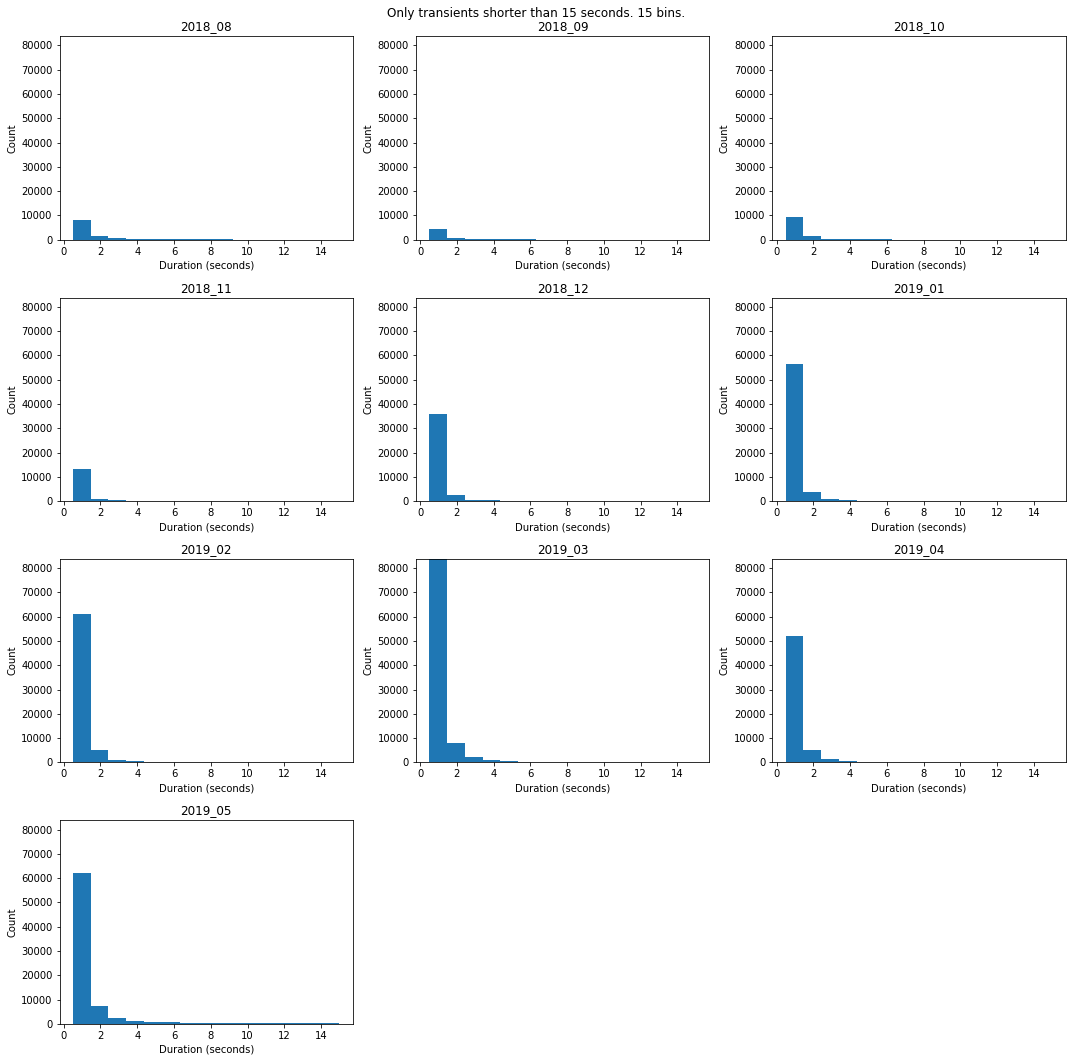

In [155]:
plot_duration_histograms(monthly_transient_durations, bins=20, title="All transients.", xunits='minutes')
plot_duration_histograms(monthly_transient_durations, bins=20, min_duration=3*60, title="Only transients longer than 3 minutes.", xunits='minutes')
plot_duration_histograms(monthly_transient_durations, bins=20, max_duration=3*60, title="Only transients shorter than 3 minutes.")
plot_duration_histograms(monthly_transient_durations, bins=15, max_duration=15, title="Only transients shorter than 15 seconds.")

In [156]:
for transient_durations, month in zip(monthly_transient_durations, months):
    print(month)
    report_transient_stats(transient_durations)
    print()

2018_08
min (s) 0.5
max (s) 28.966666666666665
max (mins) 28.97
max (h) 0.48
sd  47.46305169081882
durations > 0.5  7326
durations = 0.5  6184

2018_09
min (s) 0.5
max (s) 57.36666666666667
max (mins) 57.37
max (h) 0.96
sd  88.93874024660622
durations > 0.5  3669
durations = 0.5  3280

2018_10
min (s) 0.5
max (s) 127.30833333333334
max (mins) 127.31
max (h) 2.12
sd  74.67025998097311
durations > 0.5  5355
durations = 0.5  7417

2018_11
min (s) 0.5
max (s) 71.1
max (mins) 71.10
max (h) 1.19
sd  37.176971750702606
durations > 0.5  4921
durations = 0.5  11109

2018_12
min (s) 0.5
max (s) 212.48333333333332
max (mins) 212.48
max (h) 3.54
sd  68.31600218228407
durations > 0.5  11541
durations = 0.5  28908

2019_01
min (s) 0.5
max (s) 27.333450000000003
max (mins) 27.33
max (h) 0.46
sd  8.689977496764183
durations > 0.5  17595
durations = 0.5  44919

2019_02
min (s) 0.5
max (s) 32.733216666666664
max (mins) 32.73
max (h) 0.55
sd  8.544279156443034
durations > 0.5  21587
durations = 0.5  4743

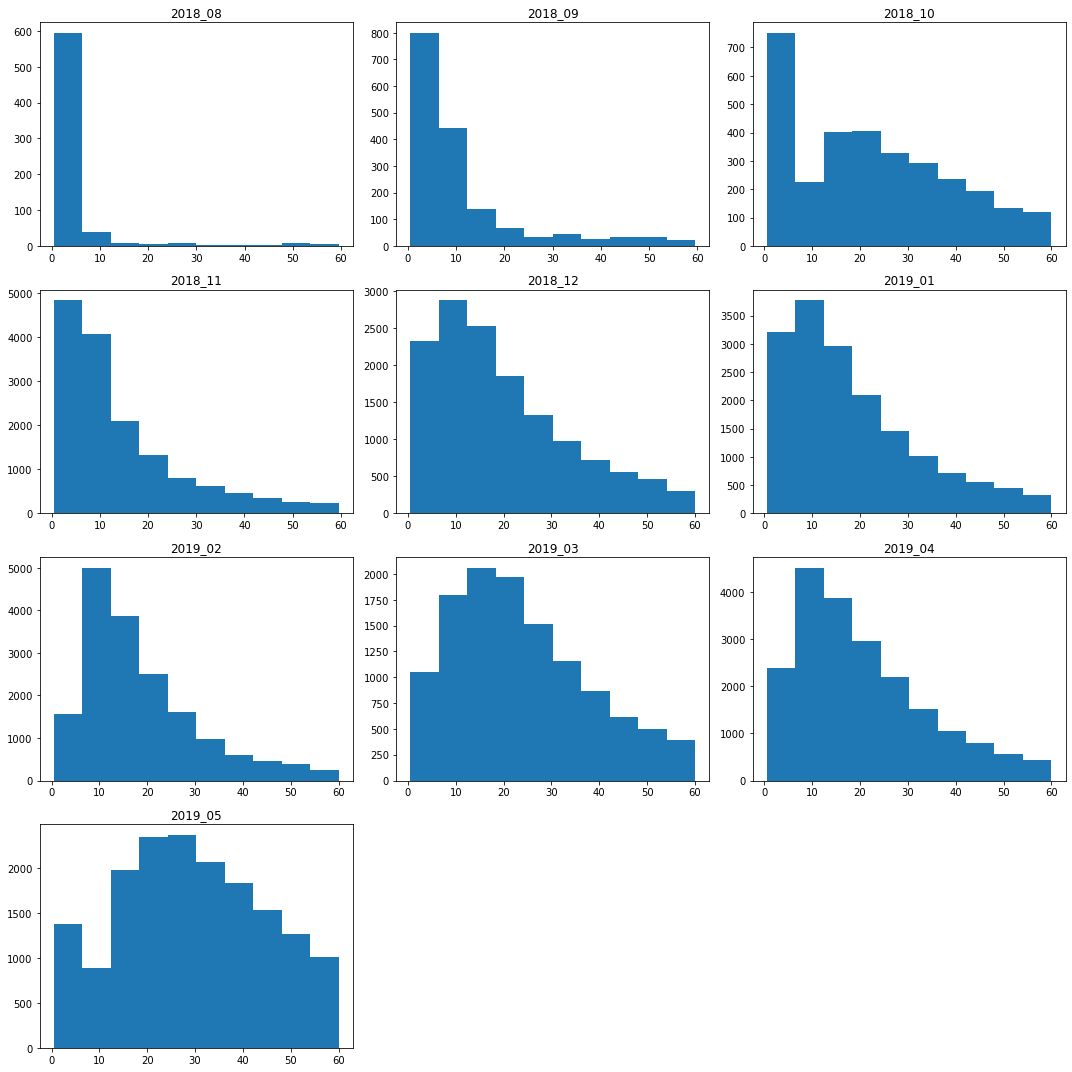

In [ ]:
fig = plt.figure(figsize=(15,15))

i = 0
for transient_durations, month in zip(monthly_transient_durations, months):
    i+=1
    ax = fig.add_subplot(4,3,i)
    ax.set_title(month)
    ax.hist(transient_durations[transient_durations<60], bins=10)

plt.tight_layout()
plt.show()